In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 

In [2]:
data=pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
print(data.shape)
print(data.isnull().sum())

(150, 6)
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Now , we are going to cluster the data with variables as sepal length and sepal width

In [6]:
x=data.iloc[:,[1,2]].values

Text(0.5, 1.0, 'Elbow method')

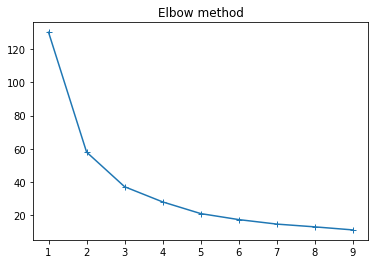

In [7]:
elbow=[]
from sklearn.cluster import KMeans
kmeans=KMeans()
for i in range(1,10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(x)
    elbow.append(kmeans.inertia_)
plt.plot(range(1,10),elbow,marker='+') 
plt.title('Elbow method')

### From the elbow method we can see that 3 cluster are suitable 

In [8]:
kmeans=KMeans(n_clusters=3,random_state=0)
kmeans.fit(x)
y_kmeans=kmeans.predict(x)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

Text(0, 0.5, 'Sepal width')

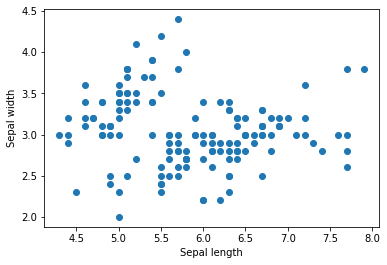

In [9]:
plt.scatter(x[:,0],x[:,1])
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

Text(0.5, 1.0, 'Actual with respect to species')

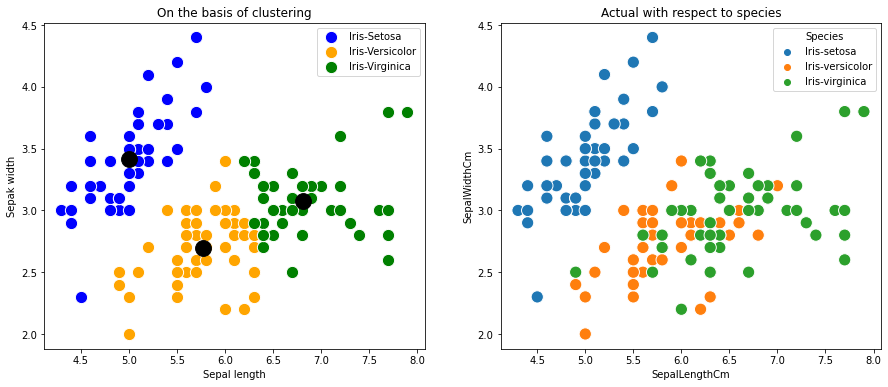

In [12]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.scatterplot(x=x[y_kmeans==0,0],y=x[y_kmeans==0,1],color='blue',s=150,label='Iris-Setosa')
sns.scatterplot(x=x[y_kmeans==2,0],y=x[y_kmeans==2,1],color='orange',s=150,label='Iris-Versicolor')
sns.scatterplot(x=x[y_kmeans==1,0],y=x[y_kmeans==1,1],color='green',s=150,label='Iris-Virginica')
plt.xlabel('Sepal length')
plt.ylabel('Sepak width')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=250,c='black')
plt.title('On the basis of clustering')
plt.subplot(1,2,2)
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',hue='Species',data=data,s=150)
plt.title('Actual with respect to species')


# Thank you !!